<h1> Actividad NLP - 1.0 - Creación de Diccionario </h1>

A01639224 | Fausto Alejandro Palma Cervantes

TC3007C.502 | Inteligencia artificial avanzada para la ciencia de datos II

17 de octubre de 2023


In [1]:
# Install library to calculate the Levenshtein distance between words
!pip install python-Levenshtein

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 169.4/169.4 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 17.2 MB/s eta 0:00:00


## Contador de palabras

In [2]:
# Import the necessary libraries and moduoles
import urllib
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import Levenshtein

In [3]:
# Open the selected .TXT file through its URL
url = 'https://www.gutenberg.org/cache/epub/68220/pg68220.txt'
file = urllib.request.urlopen(url)

In [4]:
# Create a dictionary
dictionary = {}

# Save every word and the number of times it's used
for line in file:
  line = line.decode('utf-8-sig')
  for word in re.split(r'[-\s]+', line):
    word = re.sub(r"[^a-záéíóúñü]", '', word.lower())
    if word:
      if word in dictionary:
        dictionary[word] = dictionary[word]+1
      else:
        dictionary[word] = 1

# Print the dictionary
print(dictionary)

{'the': 188, 'project': 88, 'gutenberg': 87, 'ebook': 13, 'of': 122, 'compendio': 7, 'del': 2825, 'derecho': 939, 'público': 98, 'romano': 190, 'this': 46, 'is': 23, 'for': 26, 'use': 14, 'anyone': 5, 'anywhere': 2, 'in': 65, 'united': 15, 'states': 20, 'and': 67, 'most': 5, 'other': 17, 'parts': 2, 'world': 2, 'at': 14, 'no': 1964, 'cost': 3, 'with': 47, 'almost': 2, 'restrictions': 2, 'whatsoever': 2, 'you': 74, 'may': 15, 'copy': 12, 'it': 15, 'give': 4, 'away': 2, 'or': 77, 're': 4, 'under': 6, 'terms': 22, 'license': 17, 'included': 3, 'online': 5, 'wwwgutenbergorg': 5, 'if': 22, 'are': 23, 'not': 28, 'located': 7, 'will': 8, 'have': 7, 'to': 82, 'check': 4, 'laws': 10, 'country': 4, 'where': 5, 'before': 4, 'using': 6, 'title': 1, 'author': 1, 'theodor': 1, 'mommsen': 3, 'translator': 1, 'pedro': 1, 'dorado': 2, 'montero': 1, 'release': 1, 'date': 3, 'june': 1, 'language': 1, 'spanish': 1, 'original': 3, 'publication': 1, 'spain': 1, 'la': 8468, 'españa': 8, 'moderna': 4, 'credit

In [5]:
# Sort the dictionary by the number of times each word is used
dictionary = dict(sorted(dictionary.items(), key=lambda item:item[1], reverse=True))
print(dictionary)

{'de': 12059, 'la': 8468, 'que': 5680, 'el': 5517, 'los': 5280, 'en': 4676, 'a': 4152, 'y': 3786, 'del': 2825, 'se': 2772, 'por': 2541, 'las': 2148, 'no': 1964, 'al': 1470, 'como': 1217, 'para': 1213, 'lo': 1141, 'con': 1135, 'un': 1034, 'derecho': 939, 'una': 901, 'o': 854, 'más': 733, 'es': 709, 'esta': 649, 'su': 632, 'este': 621, 'era': 608, 'pero': 605, 'comunidad': 554, 'magistrados': 552, 'también': 517, 'cuando': 509, 'senado': 500, 'fue': 483, 'mismo': 444, 'sin': 417, 'todo': 410, 'sobre': 387, 'magistrado': 366, 'ser': 364, 'ciudadanos': 361, 'ya': 347, 'ciudad': 347, 'sino': 330, 'si': 329, 'estado': 326, 'solo': 326, 'desde': 307, 'entre': 302, 'comicios': 301, 'tiempos': 301, 'militar': 301, 'magistratura': 294, 'general': 293, 'época': 287, 'sus': 285, 'cual': 285, 'podía': 282, 'poder': 280, 'bien': 279, 'aun': 279, 'ni': 278, 'estos': 275, 'hasta': 266, 'roma': 266, 'tanto': 265, 'eran': 265, 'había': 262, 'tenía': 257, 'le': 251, 'cargo': 249, 'parte': 245, 'tiempo': 

In [6]:
# Download the list of stopwords in the corresponding language
nltk.download('stopwords')
stop_words = set(stopwords.words('spanish'))
print(stop_words)

{'eres', 'estuviésemos', 'has', 'estadas', 'eso', 'vosotros', 'estuvimos', 'el', 'sentido', 'esas', 'hubiste', 'fuimos', 'seréis', 'cual', 'fuera', 'tendríais', 'te', 'él', 'míos', 'ese', 'tenidas', 'sin', 'estén', 'fueses', 'mí', 'fuisteis', 'estuviesen', 'habrán', 'tuyos', 'estuvieses', 'seríamos', 'este', 'nuestra', 'tendría', 'le', 'estando', 'hubiéramos', 'vuestros', 'más', 'fue', 'habidos', 'una', 'les', 'hayan', 'estaba', 'estamos', 'tiene', 'estar', 'estabas', 'haya', 'habiendo', 'serían', 'han', 'son', 'hubieras', 'lo', 'tuvierais', 'habéis', 'tienen', 'habidas', 'tuve', 'estarían', 'serán', 'estaréis', 'tuviste', 'estaríais', 'habida', 'habías', 'tuya', 'pero', 'os', 'nuestros', 'hubiera', 'esos', 'habría', 'habrías', 'estaban', 'están', 'hubiésemos', 'yo', 'tendrán', 'todos', 'sentidas', 'hubisteis', 'tengas', 'somos', 'tendréis', 'había', 'sentida', 'tuvieran', 'tuviera', 'estaremos', 'estuviese', 'ella', 'hubieseis', 'tuviesen', 'fuiste', 'nuestras', 'estuve', 'erais', 'mu

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [7]:
# Create a dictionary with the most frequently used words (excluding stopwords)
n_dictionary = {key: value for key, value in dictionary.items() if key not in stop_words}
n_dictionary = dict(list(n_dictionary.items())[:100])

print(n_dictionary)

{'derecho': 939, 'comunidad': 554, 'magistrados': 552, 'senado': 500, 'mismo': 444, 'magistrado': 366, 'ser': 364, 'ciudadanos': 361, 'ciudad': 347, 'sino': 330, 'si': 329, 'solo': 326, 'comicios': 301, 'tiempos': 301, 'militar': 301, 'magistratura': 294, 'general': 293, 'época': 287, 'podía': 282, 'poder': 280, 'bien': 279, 'aun': 279, 'roma': 266, 'cargo': 249, 'parte': 245, 'tiempo': 240, 'menos': 237, 'cada': 231, 'misma': 228, 'después': 227, 'procedimiento': 225, 'ciudadanía': 224, 'tal': 221, 'según': 220, 'pág': 214, 'hecho': 212, 'caso': 210, 'administración': 207, 'emperador': 207, 'así': 203, 'manera': 200, 'principio': 200, 'ciudadano': 198, 'imperium': 194, 'romano': 190, 'guerra': 190, 'cónsules': 190, 'the': 188, 'embargo': 186, 'república': 186, 'luego': 184, 'modo': 184, 'dentro': 182, 'organización': 181, 'servicio': 181, 'hacer': 179, 'cuanto': 179, 'cargos': 178, 'ejército': 177, 'competencia': 174, 'principado': 172, 'lugar': 171, 'respecto': 169, 'funciones': 169,

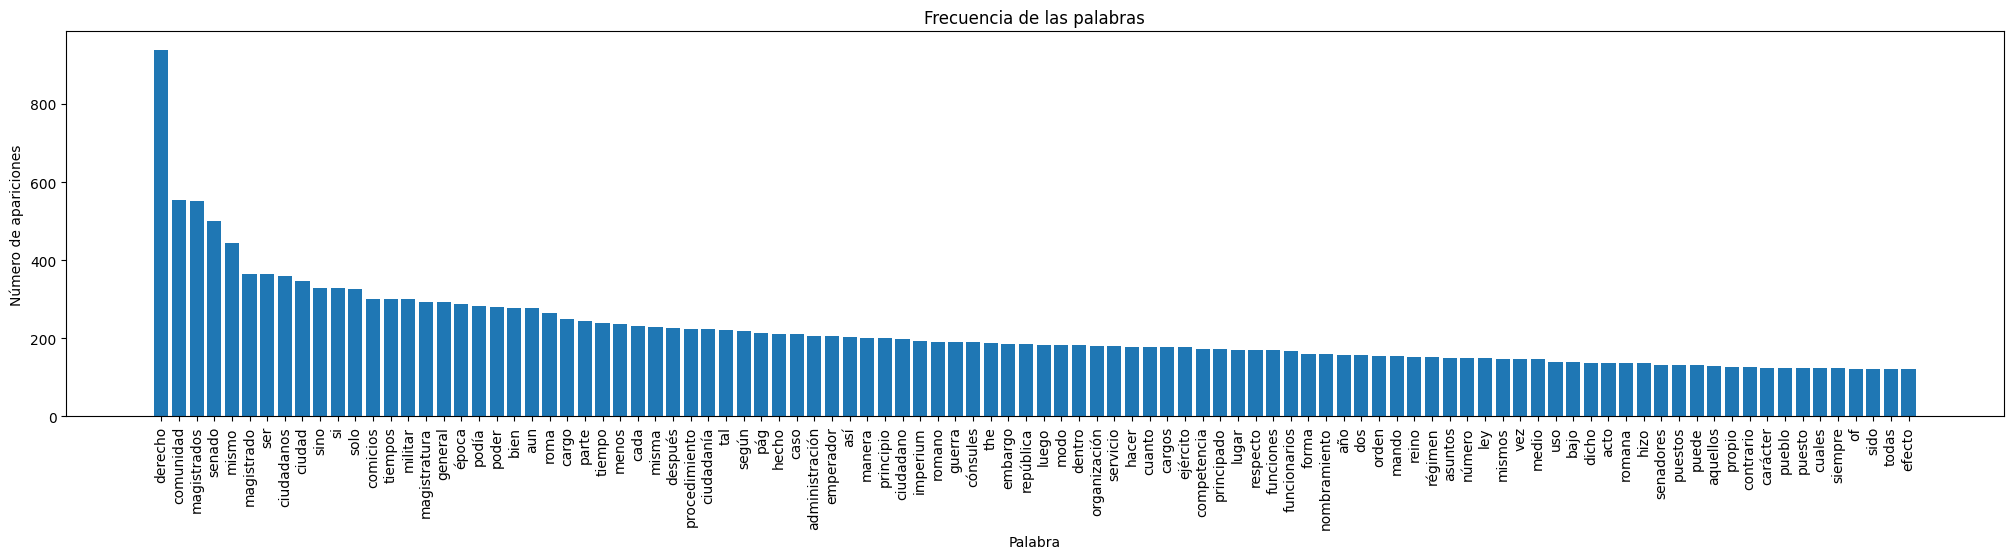

In [8]:
# Create a histogram with the most frequently used words
plt.figure(figsize=(25, 5))
plt.bar(n_dictionary.keys(), n_dictionary.values())
plt.title('Frecuencia de las palabras')
plt.xlabel('Palabra')
plt.xticks(rotation=90)
plt.ylabel('Número de apariciones')
plt.show()

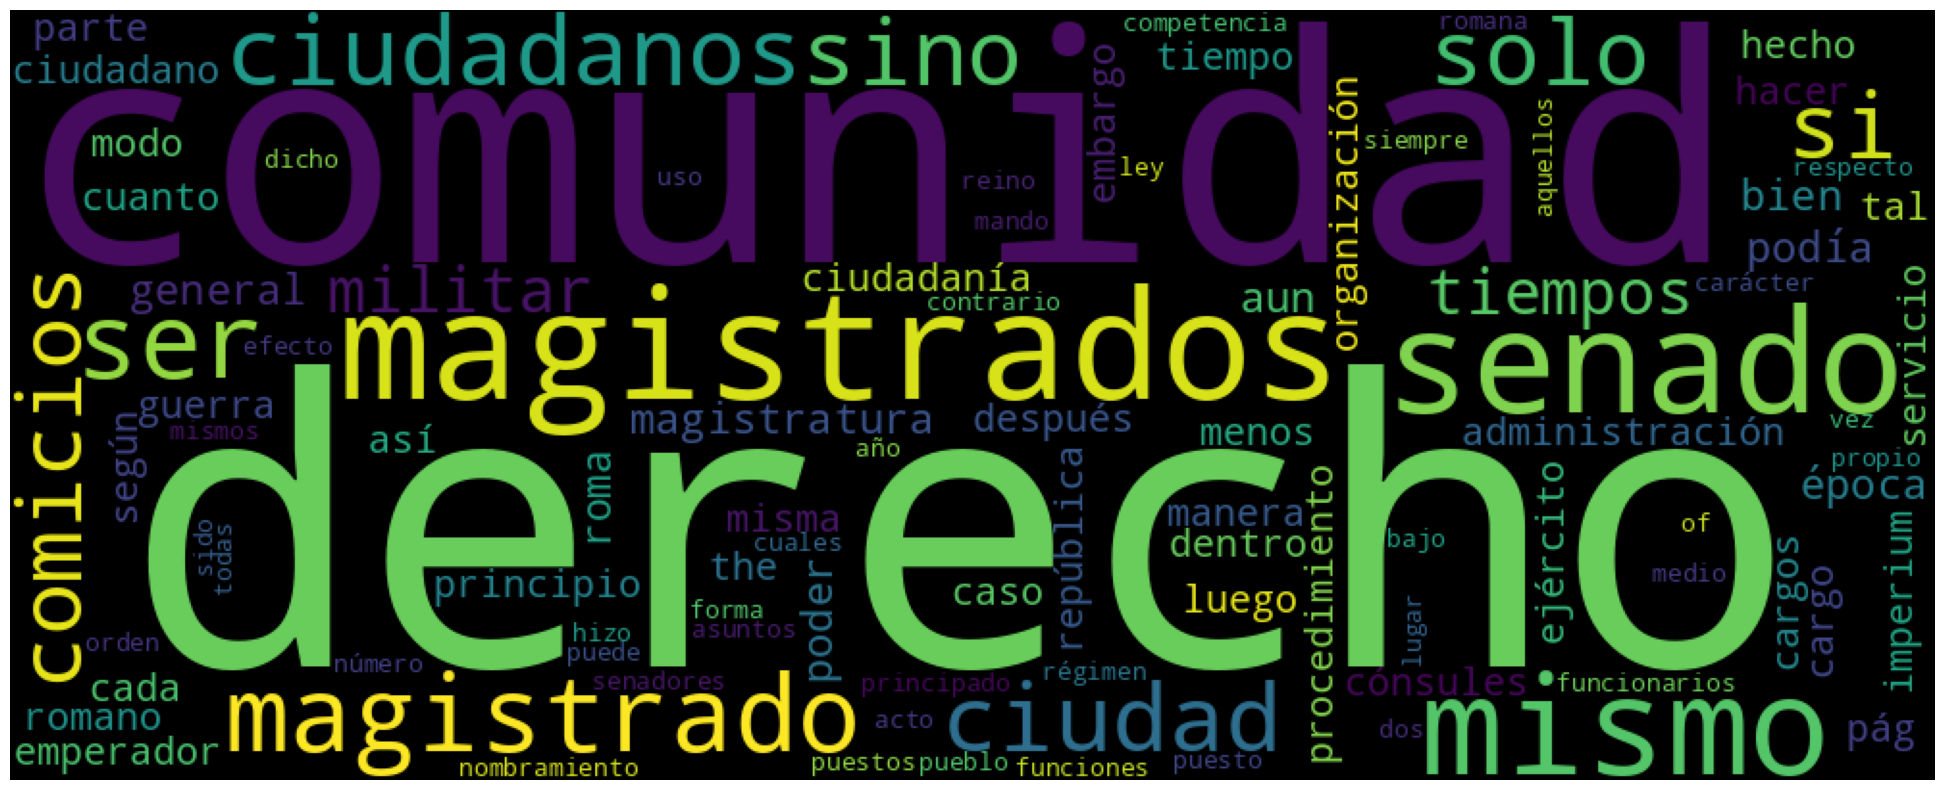

In [9]:
# Create a word cloud with the most frequently used words
plt.figure(figsize=(25, 10))
plt.imshow(WordCloud(width=1000, height=400).generate_from_frequencies(n_dictionary))
plt.axis('off')
plt.show()

## Bonus

In [13]:
# Perform text correction through string distance calculation
string = input()

print('Texto original: ', string)
print('Correción del texto: ', end='')
for word in str.split(string):
  autocorrect_d = max_int = float('inf')
  autocorrect_w = ''
  for definition in dictionary:
    distance = Levenshtein.distance(word, definition)
    if(distance < autocorrect_d):
      autocorrect_d = distance
      autocorrect_w = definition
  print(autocorrect_w, end=' ')

El respeto al dercho ageno es la paz.
Texto original:  El respeto al dercho ageno es la paz.
Correción del texto: el respeto al derecho ajeno es la paz 